In [126]:
#Import libraries

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## 1) Import Data

In [127]:
df = pd.read_csv('weather.csv')

In [128]:
df.head()

,yyyy,mm,tmax,tmin,af_hours,rain_mm,sun,Unnamed: 7
0,1948,1,8.9,3.3,---,85.0,---,NaN
1,1948,2,7.9,2.2,---,26.0,---,NaN
2,1948,3,14.2,3.8,---,14.0,---,NaN
3,1948,4,15.4,5.1,---,35.0,---,NaN
4,1948,5,18.1,6.9,---,57.0,---,NaN


In [129]:
df.describe()

,yyyy,mm,tmax,tmin,rain_mm
count,856.000000,856.000000,856.000000,856.000000,856.000000
mean,1983.168224,6.481308,14.878855,7.059696,50.338785
std,20.604881,3.457630,5.778203,4.460131,29.743532
min,1948.000000,1.000000,0.800000,-4.600000,0.300000
25%,1965.000000,3.000000,9.700000,3.300000,27.775000
50%,1983.000000,6.000000,14.700000,6.500000,46.450000
75%,2001.000000,9.000000,20.025000,11.200000,68.800000
max,2019.000000,12.000000,28.300000,16.700000,174.800000


In [130]:
df['month'] = df['yyyy'].map(str)  + '-' + df['mm'].map(str)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 9 columns):
yyyy          856 non-null int64
mm            856 non-null int64
tmax          856 non-null float64
tmin          856 non-null float64
af_hours      856 non-null object
rain_mm       856 non-null float64
sun           856 non-null object
Unnamed: 7    4 non-null object
month         856 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 60.3+ KB


In [132]:
df.head()

,yyyy,mm,tmax,tmin,af_hours,rain_mm,sun,Unnamed: 7,month
0,1948,1,8.9,3.3,---,85.0,---,NaN,1948-1
1,1948,2,7.9,2.2,---,26.0,---,NaN,1948-2
2,1948,3,14.2,3.8,---,14.0,---,NaN,1948-3
3,1948,4,15.4,5.1,---,35.0,---,NaN,1948-4
4,1948,5,18.1,6.9,---,57.0,---,NaN,1948-5


In [133]:
df = df[['month','tmax']]

In [134]:
df.head()

,month,tmax
0,1948-1,8.9
1,1948-2,7.9
2,1948-3,14.2
3,1948-4,15.4
4,1948-5,18.1


## Visualise data

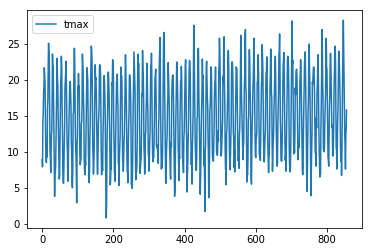

In [135]:
df.plot()

In [136]:
from datetime import datetime

In [137]:
df['month'] = pd.to_datetime(df['month'])

In [138]:
df.head()

,month,tmax
0,1948-01-01,8.9
1,1948-02-01,7.9
2,1948-03-01,14.2
3,1948-04-01,15.4
4,1948-05-01,18.1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 2 columns):
month    856 non-null datetime64[ns]
tmax     856 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.5 KB


In [140]:
## set index to the date rather than the 0,1,2 column
df.set_index('month',inplace=True)

In [141]:
df.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='month', length=856, freq=None)

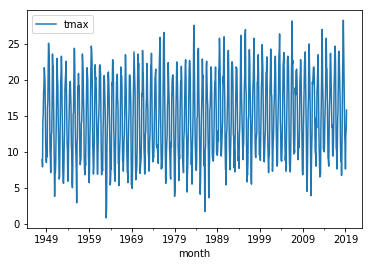

In [142]:
df.plot()

In [143]:
## Since we have set the index, we can now refer to it to filter the data. You can do other things, have a look at them in your own time
df['2018']

,tmax
month,
2018-01-01,9.7
2018-02-01,6.7
2018-03-01,9.8
2018-04-01,15.5
2018-05-01,20.8
2018-06-01,24.2
2018-07-01,28.3
2018-08-01,24.5
2018-09-01,20.9


## Manipulate data to make it time series

Even though our data already has date column, we are converting to a series because we'll use functions that call to series

In [144]:
maxtemp = df['tmax']

In [145]:
maxtemp.head()

month
1948-01-01     8.9
1948-02-01     7.9
1948-03-01    14.2
1948-04-01    15.4
1948-05-01    18.1
Name: tmax, dtype: float64

In [146]:
type(maxtemp)

pandas.core.series.Series

We want to make some predictions. Ideally build a model that predicts from the graph plot above in a similar shape.


## Model = ARIMA (p,d,q)

Need 3 parameters p,d,q


model could be additive or multiplicative - need to experiment with these to get a feel of results
if fluctuations increase with the trend then use multiplicative - so overall plus fluctuations both going up

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(maxtemp, model='additive',freq=12)


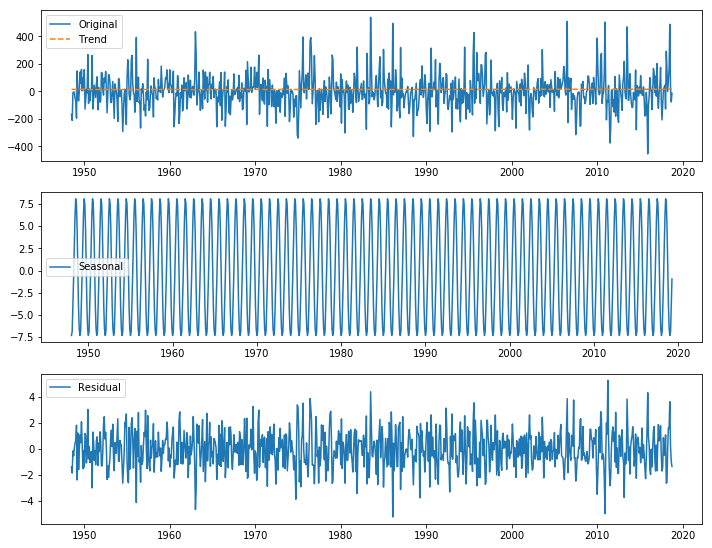

In [148]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend, label='Trend', linestyle='--')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()



# (Partial) Autocorrelation Function

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 50)

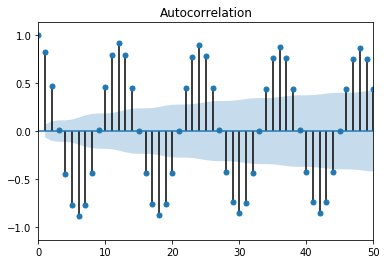

In [150]:
plot_acf(maxtemp)

plt.xlim(0,50)

Using pandas diff model to differentiate 

In [151]:
decomposition = seasonal_decompose(diff, model='additive', freq=12)

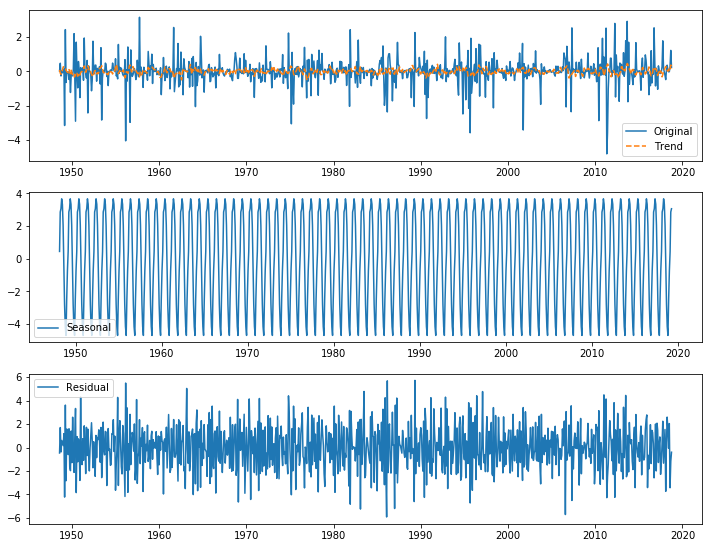

In [182]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend, label='Trend', linestyle='--')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()



# d = 0 (i.e. num of times differentiate)

(0, 20)

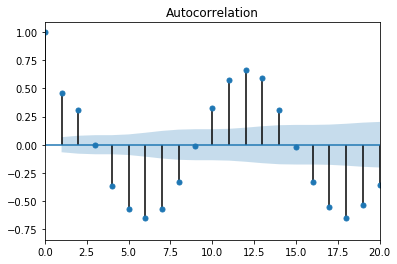

In [153]:
plot_acf(diff)

plt.xlim(0,20)

rule of thumb, to look at the last lag before the points disappear into the blue bar

in this case after 3, it disappears

# q=3 is the value we decided using above graph

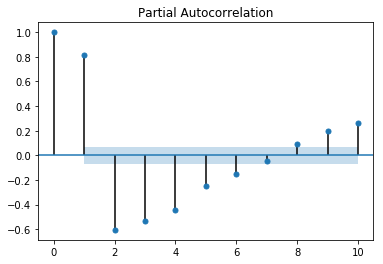

In [154]:
plot_pacf(maxtemp, lags=10)
plt.show()

# p=6 as we're looking for the value before it disappears into the shaded area

# Building the ARIMA model

#### Using Test & Training split

As we're using time series, we need it to predict future. We need to put placeholder for future data it is trying to predict

Cannot use sklearn train test as we have series data

Using pandas functionality, date index 
train data is up till June 2018
test data is from 27 May 2018

In [155]:
train = maxtemp[:'06-2018'].dropna()
test = maxtemp['07-2018':].dropna()

In [156]:
train.tail()

month
2018-02-01     6.7
2018-03-01     9.8
2018-04-01    15.5
2018-05-01    20.8
2018-06-01    24.2
Name: tmax, dtype: float64

In [157]:
test.head()

month
2018-07-01    28.3
2018-08-01    24.5
2018-09-01    20.9
2018-10-01    16.5
2018-11-01    12.2
Name: tmax, dtype: float64

In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## p,d,q = 6,0,3
model = SARIMAX(train,order=(6,0,3), seasonal_order=(1,1,0,12), enforce_stationarity = False, enforce_invertibility = False)

T:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [173]:
results = model.fit()

T:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [178]:
pred = results.predict(start='01-1948', end = '06-2019')

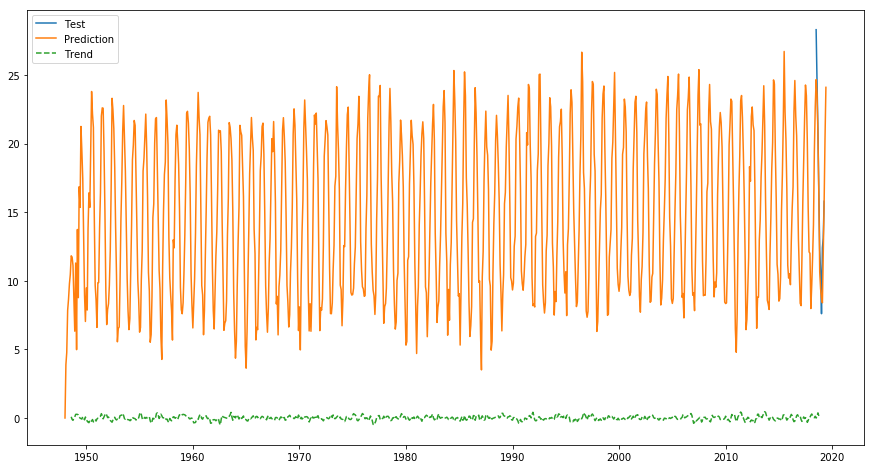

In [180]:
plt.figure(figsize=(15,8))
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Prediction')
plt.plot(trend, label='Trend', linestyle='--')
##plt.plot(train, label='Train')
plt.legend(loc='best')

In [176]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               tmax   No. Observations:                  846
Model:             SARIMAX(6, 0, 3)x(1, 1, 0, 12)   Log Likelihood               -1685.893
Date:                            Tue, 28 May 2019   AIC                           3393.787
Time:                                    17:50:47   BIC                           3445.535
Sample:                                01-01-1948   HQIC                          3413.648
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8747      1.019      0.859      0.390      -1.122       2.871
ar.L2         -0.1293      1.428     -0.091      0.928      -2.927       2.669
ar.L3         -0.0179      0.864     -0.021      0.983      -1.712       1.676
ar.L4         -0.0699      0.130     -0.536      0.592      -0.325       0.186
ar.L5          0.0029      0.085      0.035      0.972      -0.164       0.170
ar.L6          0.0548      0.079      0.695      0.487      -0.100       0.209
ma.L1          7.0485    196.526      0.036      0.971    -378.135     392.232
ma.L2         -5.8233    131.747     -0.044      0.965    -264.043     252.397
ma.L3          1.1042     15.274      0.072      0.942     -28.832      31.041
ar.S.L12      -0.4887      0.033    -14.888      0.000      -0.553      -0.424
sigma2         0.0598      2.971      0.020      0.984      -5.763       5.883
===================================================================================
Ljung-Box (Q):                      146.12   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.00   Prob(JB):                         0.50
Heteroskedasticity (H):               0.95   Skew:                            -0.10
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

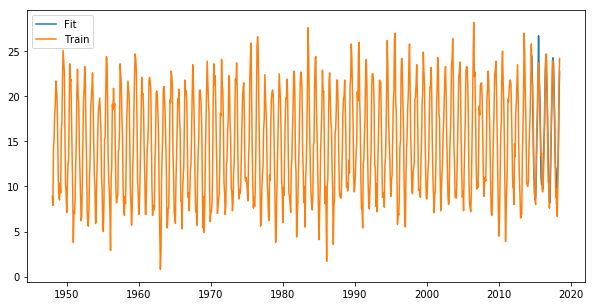

In [177]:
fit= results.predict(start='06-2014', end = '06-2018')[1:] ## this 1: says ignore first point which is a zero

plt.figure(figsize=(10,5))
plt.plot(fit,label='Fit')
plt.plot(train, label = 'Train')
plt.legend(loc='best')